In [66]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

In [143]:
sts_en_en = pd.read_csv("en_en.txt",sep="\t", header=None,on_bad_lines='skip')
sts_en_en.rename(columns={0: 'en-1', 1: 'en-2',2:'goldscore'}, inplace=True)
min_max_scaler = MinMaxScaler()
sts_en_en['goldscore'] = min_max_scaler.fit_transform(sts_en_en['goldscore'].values.reshape(-1,1))

In [151]:
sts_en_de = pd.read_csv("en-de.txt",sep="\t", header=None,on_bad_lines='skip')
sts_en_de.rename(columns={0: 'en', 1: 'de',2:'goldscore'}, inplace=True)
min_max_scaler = MinMaxScaler()
sts_en_de['goldscore'] = min_max_scaler.fit_transform(sts_en_de['goldscore'].values.reshape(-1,1))

In [158]:
sts_en_fr = pd.read_csv("fr-en.txt",sep="\t", header=None,on_bad_lines='skip')
sts_en_fr.rename(columns={0: 'fr', 1: 'en',2:'goldscore'}, inplace=True)
min_max_scaler = MinMaxScaler()
sts_en_fr['goldscore'] = min_max_scaler.fit_transform(sts_en_fr['goldscore'].values.reshape(-1,1))

In [176]:
sts_en_it = pd.read_csv("it-en.txt",sep="\t", header=None,on_bad_lines='skip')
sts_en_it.rename(columns={0: 'it', 1: 'en',2:'goldscore'}, inplace=True)
min_max_scaler = MinMaxScaler()
sts_en_it['goldscore'] = min_max_scaler.fit_transform(sts_en_it['goldscore'].values.reshape(-1,1))

In [144]:
embedder_dist = SentenceTransformer('distiluse-base-multilingual-cased-v1')

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/114 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.38k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/556 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/539M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/452 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/996k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/341 [00:00<?, ?B/s]

In [168]:
embedder_para = SentenceTransformer('paraphrase-multilingual-mpnet-base-v2')

In [145]:
embeddings_en1 = embedder_para.encode(sts_en_en['en-1'])
embeddings_en1.shape

(250, 512)

In [146]:
embeddings_en2 = embedder_para.encode(sts_en_en['en-2'])
embeddings_en2.shape

(250, 512)

In [197]:
embeddings_en = embedder_para.encode(sts_en_de['en'])
embeddings_en.shape

(250, 768)

In [189]:
embeddings_de = embedder_para.encode(sts_en_de['de'])
embeddings_de.shape

(250, 768)

In [206]:
sentence_embeddings1 = embedder_para.encode("A boy is playing basketball")
sim_arr=cosine_similarity([sentence_embeddings1],embeddings_de).reshape(250,)

di=dict(zip(sim_arr,sts_en_de['de']))

sim_arr=np.sort(sim_arr)[::-1]
sim_arr=sim_arr[0:10]

for i in sim_arr:
    print(di[i])
    

Eine Person spielt in einem Team Basketball.
Der Basketball-Spieler steht davor Punkte für sein Mannschaft  zu erzielen.
Ein Basketball-Spieler spielt im Home-Coming-Spiel.
Die Männer spielen eine Runde Basketball.
Das ist ein Kind mit einem Ball.
Ein Mann tritt einen Ball.
Ein Spieler fängt den Ball.
Der Junge macht ein Foto.
Ein Junge läuft auf dem Gehweg.
Ein Junge mit Jacke spielt.


In [169]:
embeddings_en = embedder_para.encode(sts_en_fr['en'])
embeddings_en.shape

(250, 768)

In [170]:
embeddings_fr = embedder_para.encode(sts_en_fr['fr'])
embeddings_fr.shape

(250, 768)

In [182]:
embeddings_en = embedder_dist.encode(sts_en_it['en'])
embeddings_en.shape

(250, 512)

In [183]:
embeddings_it = embedder_dist.encode(sts_en_it['it'])
embeddings_it.shape

(250, 512)

In [147]:
embeddings1 = np.array(embeddings_en1)
embeddings2 = np.array(embeddings_en2)
similarities = []
for i in range(0,len(embeddings1)):
    similarities.append(cosine_similarity(embeddings1[i].reshape(1,-1), embeddings2[i].reshape(1,-1)))
sts_en_en['sim_score'] = similarities
sts_en_en['sim_score']=sts_en_en['sim_score'].str[0] 
sts_en_en['sim_score']=sts_en_en['sim_score'].str[0] 

In [172]:
embeddings1 = np.array(embeddings_en)
embeddings2 = np.array(embeddings_fr)
similarities = []
for i in range(0,len(embeddings1)):
    similarities.append(cosine_similarity(embeddings1[i].reshape(1,-1), embeddings2[i].reshape(1,-1)))
sts_en_fr['sim_score'] = similarities
sts_en_fr['sim_score']=sts_en_fr['sim_score'].str[0] 
sts_en_fr['sim_score']=sts_en_fr['sim_score'].str[0] 

In [155]:
embeddings1 = np.array(embeddings_en)
embeddings2 = np.array(embeddings_de)
similarities = []
for i in range(0,len(embeddings1)):
    similarities.append(cosine_similarity(embeddings1[i].reshape(1,-1), embeddings2[i].reshape(1,-1)))
sts_en_de['sim_score'] = similarities
sts_en_de['sim_score']=sts_en_de['sim_score'].str[0] 
sts_en_de['sim_score']=sts_en_de['sim_score'].str[0] 

In [184]:
embeddings1 = np.array(embeddings_en)
embeddings2 = np.array(embeddings_it)
similarities = []
for i in range(0,len(embeddings1)):
    similarities.append(cosine_similarity(embeddings1[i].reshape(1,-1), embeddings2[i].reshape(1,-1)))
sts_en_it['sim_score'] = similarities
sts_en_it['sim_score']=sts_en_it['sim_score'].str[0] 
sts_en_it['sim_score']=sts_en_it['sim_score'].str[0] 

In [149]:
sts_en_en['goldscore'].corr(sts_en_en['sim_score'])

0.8463119412230021

In [156]:
sts_en_de['goldscore'].corr(sts_en_de['sim_score'])

0.8004432399733243

In [173]:
sts_en_fr['goldscore'].corr(sts_en_fr['sim_score'])

0.8121415983285576

In [185]:
sts_en_it['goldscore'].corr(sts_en_it['sim_score'])

0.8009907147086813

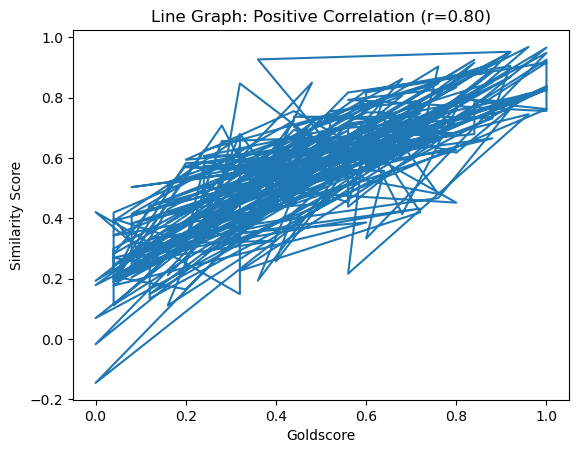

In [186]:
import matplotlib.pyplot as plt
import numpy as np

# create sample data
x = sts_en_it['goldscore']
y = sts_en_it['sim_score']

# calculate the correlation coefficient
r = np.corrcoef(x, y)[0,1]

# create a figure and axis object
fig, ax = plt.subplots()

# plot the data as a line graph
ax.plot(x, y)

# set the axis labels and title
ax.set_xlabel('Goldscore')
ax.set_ylabel('Similarity Score')
ax.set_title('Line Graph: Positive Correlation (r={:.2f})'.format(r))

# show the plot 
plt.show()
